# Pivot Tables

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic.to_csv('titanic.csv', index=False)

In [ ]:
titanic.groupby('sex')['survived'].mean()

,survived
sex,
female,0.742038
male,0.188908


In [ ]:
titanic.groupby(['sex', 'class'], observed=True)['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [ ]:
titanic.pivot_table('survived', index='sex', columns='class', aggfunc='mean', observed=True)

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


### Cuándo usar `observed=True`
- **Cuando las columnas de agrupación son de tipo `category`** (en lugar de `object` o `string`).
- **Si queremos eliminar combinaciones inexistentes** del resultado.
- **Cuando necesitamos mejorar la eficiencia**, evitando el almacenamiento de categorías irrelevantes.

In [ ]:
age = pd.cut(titanic['age'], [0, 18, 80])
age

,age
0,"(18.0, 80.0]"
1,"(18.0, 80.0]"
2,"(18.0, 80.0]"
3,"(18.0, 80.0]"
4,"(18.0, 80.0]"
...,...
886,"(18.0, 80.0]"
887,"(18.0, 80.0]"
888,NaN
889,"(18.0, 80.0]"


In [ ]:
titanic.pivot_table('survived', ['sex', age], 'class', aggfunc='mean', observed=True)

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [ ]:
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'], observed=True)

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

In [ ]:
titanic.pivot_table(index='sex', columns='class', observed=True,
                    aggfunc={'survived':'sum', 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [ ]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True, observed=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


## Birthrate Data

In [ ]:
!mkdir data
!cd data && curl -O \
https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  258k  100  258k    0     0   477k      0 --:--:-- --:--:-- --:--:--  477k


In [ ]:
births = pd.read_csv('data/births.csv')

In [ ]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [ ]:
births['decade'] = 10 * (births['year'] // 10)

In [ ]:
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


Text(0, 0.5, 'Total births per year')

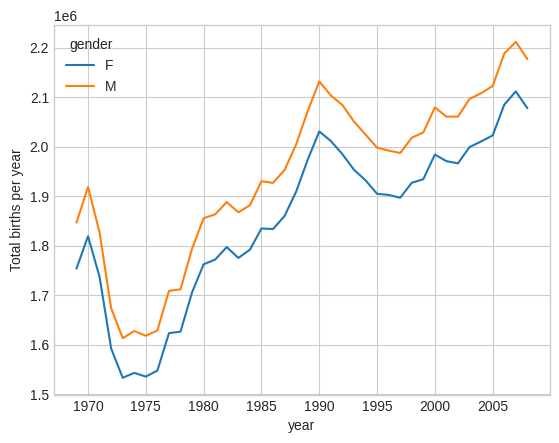

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
births.pivot_table(
    'births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('Total births per year')

In [ ]:
quartiles = np.percentile(births['births'], [25, 50, 75])
quartiles

array([4358. , 4814. , 5289.5])

In [ ]:
mu = quartiles[1]
mu

np.float64(4814.0)

In [ ]:
sig = 0.74 * (quartiles[2] - quartiles[0])

In [ ]:
births =  births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)' )

In [ ]:
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')

In [ ]:
births.head()

,year,month,day,gender,births,decade
1969-01-01,1969,1,1.0,F,4046,1960
1969-01-01,1969,1,1.0,M,4440,1960
1969-01-02,1969,1,2.0,F,4454,1960
1969-01-02,1969,1,2.0,M,4548,1960
1969-01-03,1969,1,3.0,F,4548,1960


In [ ]:
births['dayofweek'] = births.index.dayofweek

<ipython-input-33-cdbd19a79eb5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  births['dayofweek'] = births.index.dayofweek


In [ ]:
births.head()

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1.0,F,4046,1960,2
1969-01-01,1969,1,1.0,M,4440,1960,2
1969-01-02,1969,1,2.0,F,4454,1960,3
1969-01-02,1969,1,2.0,M,4548,1960,3
1969-01-03,1969,1,3.0,F,4548,1960,4


Text(0, 0.5, 'mean births by day')

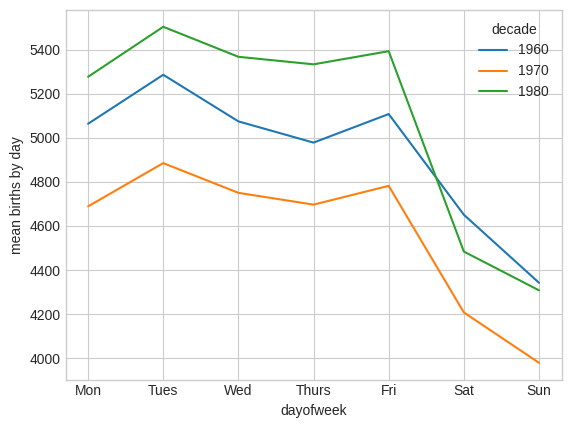

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

births.pivot_table('births', index='dayofweek',
                   columns='decade', aggfunc='mean').plot()

plt.gca().set(xticks=range(7),
              xticklabels=['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day')

In [ ]:
births_by_date =  births.pivot_table('births',
                                     [births.index.month, births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [ ]:
from datetime import datetime
births_by_date.index = [datetime(2012, month, day)
                        for (month, day) in births_by_date.index]
births_by_date.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


<Axes: >

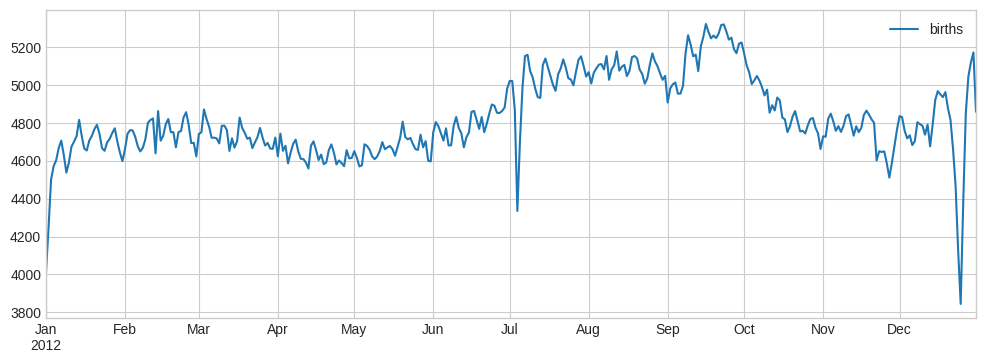

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)